<a href="https://colab.research.google.com/github/AbderrahmanS/content-based-recommendation-system/blob/main/content_based_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
df = pd.read_csv('/content/data_recomnd.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,tittle_x,cast_x,crew_x,tittle_y,cast_y,crew_y,score
0,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,The Shawshank Redemption,8.5,8205,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
1,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,Fight Club,8.3,9413,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
2,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,The Dark Knight,8.2,12002,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020
3,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,Pulp Fiction,8.3,8428,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645
4,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Inception,8.1,13752,Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239


In [3]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle_x', 'cast_x', 'crew_x', 'tittle_y', 'cast_y',
       'crew_y', 'score'],
      dtype='object')

In [4]:
df1 = df[['title' , 'vote_count' ,'vote_average','score' ]]
df1.head()

,title,vote_count,vote_average,score
0,The Shawshank Redemption,8205,8.5,8.059258
1,Fight Club,9413,8.3,7.939256
2,The Dark Knight,12002,8.2,7.920020
3,Pulp Fiction,8428,8.3,7.904645
4,Inception,13752,8.1,7.863239


In [6]:
df1.isnull().sum()

title           0
vote_count      0
vote_average    0
score           0
dtype: int64

In [8]:
# Sorting DataFrame based on the 'score' column
df_sorted = df1.sort_values(by='score', ascending=False)
df_sorted.head()

,title,vote_count,vote_average,score
0,The Shawshank Redemption,8205,8.5,8.059258
1,Fight Club,9413,8.3,7.939256
2,The Dark Knight,12002,8.2,7.920020
3,Pulp Fiction,8428,8.3,7.904645
4,Inception,13752,8.1,7.863239


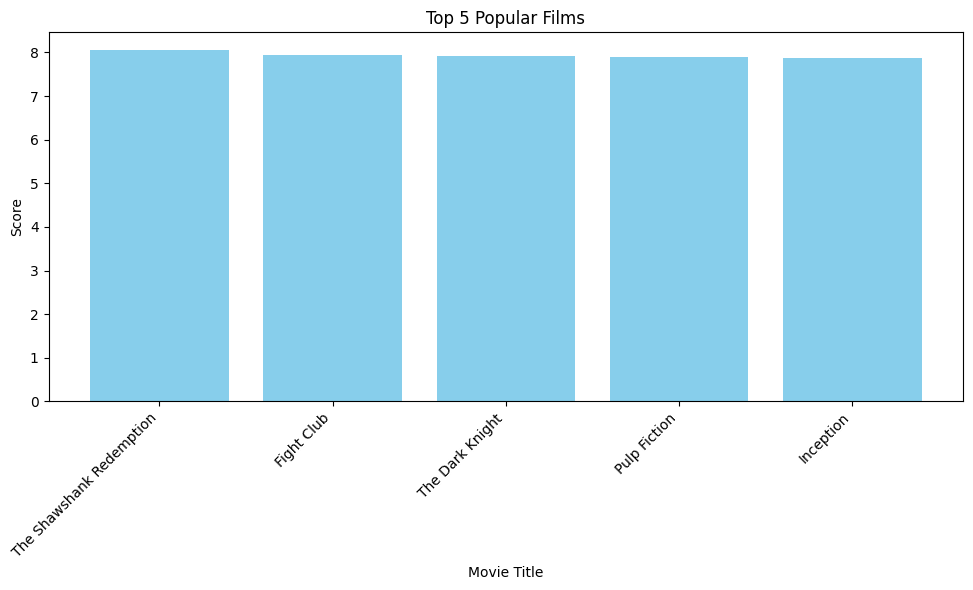

In [17]:
# Sort DataFrame by the 'score' column in descending order
df_sorted = df.sort_values(by='score', ascending=False)

# Plotting a bar histogram for the top N popular films
top_n = 5

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['title'].head(top_n), df_sorted['score'].head(top_n), color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Score')
plt.title(f'Top {top_n} Popular Films')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [12]:
df['overview'].head(5)

0    Framed in the 1940s for the double murder of h...
1    A ticking-time-bomb insomniac and a slippery s...
2    Batman raises the stakes in his war on crime. ...
3    A burger-loving hit man, his philosophical par...
4    Cobb, a skilled thief who commits corporate es...
Name: overview, dtype: object

In [14]:

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

df['overview'] = df['overview'].fillna('')
# Fit and transform the 'overview' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['overview'])

tfidf_matrix.shape

(481, 5657)

In [15]:
# Calculate the cosine similarity between movies based on the TF-IDF matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get movie recommendations based on cosine similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df[df['title'] == title].index[0]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [score[0] for score in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]


In [20]:
# Example: Get recommendations for a specific movie
movie_title = 'Inception'
recommendations = get_recommendations(movie_title)

# Print the recommendations
print(f"Recommendations for '{movie_title}':")
print(recommendations)

Recommendations for 'Inception':
216     Mission: Impossible - Rogue Nation
305                        Pitch Perfect 2
432    Transformers: Revenge of the Fallen
164                      The Fifth Element
235                        Minority Report
47                                      Up
81                    Howl's Moving Castle
27                 The Wolf of Wall Street
395                                Hancock
231                                    Saw
Name: title, dtype: object
